DATASET: has 4012 columns and 16197 rows

Import Packages

In [1]:
import pandas as pd

Load File

In [18]:
file_path = "data/els_02_12_byf3pststu_v1_0.csv"  
df = pd.read_csv(file_path)

C:\Users\LaptopUser\AppData\Local\Temp\ipykernel_13708\3654065876.py:2: DtypeWarning: Columns (1222) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


DATA PREPROCESSING:

1- Remove N/A values

In [19]:
# Remove rows with missing values
df = df.dropna()

2- Remove vars from F2, F3, and F1 transfers

In [20]:
# Remove columns starting with "F2", "F3", or "F1T"
df = df.filter(regex='^(?!F2|F3|F1T)')

3- Remove complementary dropout vars

In [21]:
# Step 3: Remove columns related to dropout programs (F1A24)
columns_to_remove = ["F1A24" + letter for letter in list("ABCDEFG")]
df = df.drop(columns=columns_to_remove)

4- Remove complementary dropout vars

In [22]:
# Step 4: Remove columns related to dropout programs (F1A24)
columns_to_remove = ["F1A25" + letter for letter in list("ABCDEFGHI")]
df = df.drop(columns=columns_to_remove)

5- Remove transfer vars

In [23]:
# Remove Transfer vars
df = df.drop(columns=["F1DOSTAT"])

6- Remove negative values by N/A

In [24]:
# Replace negative values with NA
df = df.applymap(lambda x: pd.NA if x < 0 else x)

C:\Users\LaptopUser\AppData\Local\Temp\ipykernel_13708\3866352115.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.NA if x < 0 else x)


7- Remove columns where all rows have the same value

In [25]:
# Remove columns where all rows have the same value
df = df.loc[:, df.nunique(dropna=True) > 1]

8- Remove unnecessary columns

In [29]:
# Remove specific columns
columns_to_remove = ["STU_ID", "STRAT_ID", "PSU", "F1UNIV1", "F1UNIV2A", "F1UNIV2B", "G10COHRT", "G12COHRT", "BYSQSTAT", "BYREGCTL", "BYSTLNG2", "F1QSTAT"]
df = df.drop(columns=columns_to_remove)

KeyError: "['STU_ID', 'STRAT_ID', 'PSU', 'F1UNIV1', 'F1UNIV2A', 'F1UNIV2B', 'G10COHRT', 'G12COHRT', 'BYSQSTAT', 'BYREGCTL', 'BYSTLNG2', 'F1QSTAT'] not found in axis"

9- Remove columns ending with "WT", "IM", or "FLG"

In [30]:
# Remove columns ending with "WT", "IM", or "FLG"
df = df.filter(regex='^(?!.*(?:WT|IM|FLG)$)')

10- Filter rows where "bygrdrpt" is in ("0", "1", "2")

In [31]:
# Create a boolean mask indicating rows where BYGRDRPT is in "0", "1", or "2"
df = df[df['BYGRDRPT'].isin([0, 1, 2])]

11- Remove vars with missing values

In [34]:
# Remove variables (columns) with missing values
df = df.dropna(axis=1)

In [217]:
def clean_columns(df):
    # Calculate the percentage of missing values for each column
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Find columns with 20% or more missing values
    columns_with_high_missing_values = missing_percentages[missing_percentages >= 5]

    # Print columns with their respective percentages of missing values
    if not columns_with_high_missing_values.empty:
        print("Columns with 20% or more missing values:")
        for column, percentage in columns_with_high_missing_values.items():
            print(f"{column}: {percentage:.2f}%")
    else:
        print("No columns have 20% or more missing values.")
    
    # Remove columns with 20% or more missing values
    cleaned_df = df.drop(columns=columns_with_high_missing_values.index)
    
    # Print information about removed columns
    num_removed_columns = len(columns_with_high_missing_values)
    print(f"{num_removed_columns} columns removed due to 20% or more missing values.")
    
    # Now you can use 'cleaned_df' for further analysis or processing
    return cleaned_df

In [218]:
df = clean_columns(df)

Columns with 20% or more missing values:
BYSEX: 6.02%
BYRACE: 6.84%
BYSTLANG: 6.84%
BYHOMLNG: 8.81%
BYDOB_P: 7.14%
BYPARACE: 7.41%
BYPARLNG: 7.12%
BYPLANG: 6.93%
BYFCOMP: 6.27%
BYSIBSTR: 7.90%
BYSIBHOM: 8.63%
BYGNSTAT: 7.22%
BYPARED: 6.30%
BYMOTHED: 6.32%
BYFATHED: 6.45%
BYOCCUM: 6.28%
BYOCCUF: 6.43%
BYSES1QU: 6.84%
BYSES2QU: 6.84%
BYNONUSG: 7.03%
BYRISKFC: 9.65%
BYQXDATP: 6.84%
BYTXSTAT: 6.84%
BYTXPAFG: 6.84%
BYXTRACU: 8.42%
BY10FLP: 8.25%
F1STEXP: 5.56%
F1QMODE: 5.56%
F1QXDATP: 5.56%
F1HIMATH: 6.29%
F1PSEPLN: 9.58%
F1XTRACU: 9.63%
F1WRKHRS: 7.32%
F1COMPHR: 7.65%
F1RHTUNP: 7.83%
F1RMAT_P: 7.83%
F1RTRCC: 7.83%
F1RGPP2: 7.90%
BYS14: 7.21%
BYS15: 8.07%
BYS34B: 9.26%
BYS37: 8.34%
BYS41A: 8.73%
BYS41B: 8.75%
BYS41C: 9.04%
BYS41D: 8.83%
BYS41E: 8.94%
BYS41F: 9.07%
BYS41G: 9.07%
BYS41H: 9.07%
BYS41I: 9.28%
BYS67: 8.57%
F1S15: 9.72%
F1S16A: 7.30%
F1S16B: 7.44%
F1S16C: 6.84%
F1S16D: 7.84%
F1S16E: 7.62%
F1S16F: 7.15%
F1S16G: 8.14%
F1S16H: 7.34%
F1S16I: 8.35%
F1S17A: 7.46%
F1S17B: 7.49%
F1S17C: 

12- Remove rows where income category "BYINCOME" is None

In [36]:
df = df[~df['BYINCOME'].isin([1])]

13- Remove vars "BYURBAN" and "BYREGION" because they are mix together in "BYREGURB"

In [37]:
df.drop(columns=['BYURBAN'], inplace=True)
df.drop(columns=['BYREGION'], inplace=True)

14- Remove parent's highest education "F1PARED" because we have a variable for mother's highest education "F1MOTHED" and one for father's highest education "F1FATHED"

In [38]:
df.drop(columns=['F1PARED'], inplace=True)

RESULTING DATASET

In [39]:
# Number of rows and columns in the DataFrame
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 13119
Number of columns: 14


In [40]:
df.columns

Index(['BYINCOME', 'BYGRDRPT', 'BYG10EP', 'BYSCTRL', 'BYREGURB', 'F1SEX',
       'F1RACE', 'F1STLANG', 'F1FCOMP', 'F1MOTHED', 'F1FATHED', 'F1OCCUM',
       'F1OCCUF', 'F1EVERDO'],
      dtype='object')

SAVE DATASET TO CSV FILE

In [152]:
try:
    # Save the DataFrame to a CSV file
    df.to_csv('data/cleaned_els_02_12_byf3pststu_v1_0.csv', index=False)
    print("DataFrame saved to output.csv")
except Exception as e:
    print("An error occurred:", e)

DataFrame saved to output.csv


DISPLAY HISTOGRAMS

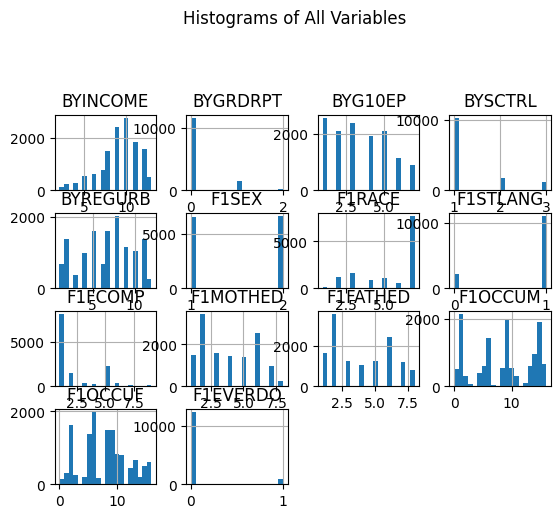

In [172]:
df.hist(bins=20)  # Increase the number of bins for more space between bars
plt.suptitle('Histograms of All Variables', x=0.5, y=1.10, ha='center', fontsize='large')
plt.show()